In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos_crudos = pd.read_excel('datos_hospitalles_gcba.xlsx')
datos_crudos.head()

,Año,2017,2016,2015,2017.1,2016.1,2015.1,2017.2,2016.2,2015.2,...,2015.25,2017.26,2016.26,2015.26,2017.27,2016.27,2015.27,2017.28,2016.28,2015.28
0,Hospital,Alvarez,Alvarez,Alvarez,Argerich,Argerich,Argerich,Durand,Durand,Durand,...,Alvear,Rocca,Rocca,Rocca,Rehabilitación Psicofísica,Rehab. Psicofísica,Rehab. Psicofísica,María Ferrer,María Ferrer,María Ferrer
1,Egresos,8279,9481,9087,12613,12965,12943,8043,7964,8454,...,364,185,179,197,504,492,614,924,1556,1239
2,Promedio Pacientes x Día,153.21,183.06,177.04,307.9,311.53,300.82,202.72,195.99,195.18,...,60.74,60.58,54.26,52.76,37.51,33.97,26.2,14.57,30.36,27.41
3,Promedio Camas Dispon,258.42,271.78,262.03,392.29,392.81,387.81,276.66,267.84,265.23,...,63.4,76.67,74.27,74.99,70.58,73.23,61.46,18.23,36.86,37.02
4,% Ocupación,59.29,67.36,67.56,78.49,79.31,77.57,73.28,73.17,73.59,...,95.8,79.02,73.06,70.35,53.15,46.39,42.63,79.95,82.37,74.03


In [5]:
datos_crudos = datos_crudos.T
datos_crudos.columns = datos_crudos.iloc[0]
datos_crudos.head()

Año,Hospital,Egresos,Promedio Pacientes x Día,Promedio Camas Dispon,% Ocupación,Promedio Permanencia,Tasa de Mortalidad,Giro,Consultas Externas
Año,Hospital,Egresos,Promedio Pacientes x Día,Promedio Camas Dispon,% Ocupación,Promedio Permanencia,Tasa de Mortalidad,Giro,Consultas Externas
2017,Alvarez,8279,153.21,258.42,59.29,6.75,5.41,32.04,462315
2016,Alvarez,9481,183.06,271.78,67.36,7.07,5.15,34.89,466690
2015,Alvarez,9087,177.04,262.03,67.56,7.11,4.47,34.68,452472
2017.1,Argerich,12613,307.9,392.29,78.49,8.91,5.48,32.15,701787


In [10]:
datos_crudos.drop('Año', axis=0, inplace=True)

In [11]:
datos_crudos.reset_index(inplace=True)
datos_crudos.head()

Año,index,Hospital,Egresos,Promedio Pacientes x Día,Promedio Camas Dispon,% Ocupación,Promedio Permanencia,Tasa de Mortalidad,Giro,Consultas Externas
0,2017,Alvarez,8279,153.21,258.42,59.29,6.75,5.41,32.04,462315
1,2016,Alvarez,9481,183.06,271.78,67.36,7.07,5.15,34.89,466690
2,2015,Alvarez,9087,177.04,262.03,67.56,7.11,4.47,34.68,452472
3,2017.1,Argerich,12613,307.9,392.29,78.49,8.91,5.48,32.15,701787
4,2016.1,Argerich,12965,311.53,392.81,79.31,8.79,5.04,33.01,738421


In [12]:
datos_crudos.columns

Index(['index', 'Hospital', 'Egresos', 'Promedio Pacientes x Día',
       'Promedio Camas Dispon', '% Ocupación', 'Promedio Permanencia',
       'Tasa de Mortalidad', 'Giro', 'Consultas Externas'],
      dtype='object', name='Año')

In [13]:
datos_crudos.columns = ['Año', 'Hospital', 'Egresos', 'Promedio Pacientes x Día',
       'Promedio Camas Dispon', '% Ocupación', 'Promedio Permanencia',
       'Tasa de Mortalidad', 'Giro', 'Consultas Externas']

In [20]:
datos_crudos.Año = datos_crudos.Año.apply(lambda x: str(x)[:4])

In [21]:
datos_crudos.head(10)

,Año,Hospital,Egresos,Promedio Pacientes x Día,Promedio Camas Dispon,% Ocupación,Promedio Permanencia,Tasa de Mortalidad,Giro,Consultas Externas
0,2017,Alvarez,8279,153.21,258.42,59.29,6.75,5.41,32.04,462315
1,2016,Alvarez,9481,183.06,271.78,67.36,7.07,5.15,34.89,466690
2,2015,Alvarez,9087,177.04,262.03,67.56,7.11,4.47,34.68,452472
3,2017,Argerich,12613,307.9,392.29,78.49,8.91,5.48,32.15,701787
4,2016,Argerich,12965,311.53,392.81,79.31,8.79,5.04,33.01,738421
5,2015,Argerich,12943,300.82,387.81,77.57,8.48,4.19,33.37,792732
6,2017,Durand,8043,202.72,276.66,73.28,9.2,6.1,29.07,403824
7,2016,Durand,7964,195.99,267.84,73.17,9.01,6.12,29.73,427955
8,2015,Durand,8454,195.18,265.23,73.59,8.43,4.54,31.87,448326
9,2017,Fernández,8989,262.83,345.13,76.15,10.67,4.05,26.04,396783


In [22]:
hospitales = datos_crudos.Hospital.unique()
hospitales

array(['Alvarez', 'Argerich', 'Durand', 'Fernández', 'Penna', 'Piñero',
       'Pirovano', 'Ramos Mejía', 'Rivadavia', 'Santojanni', 'Tornú',
       'Velez Sarsfield', 'Zubizarreta', 'Elizalde', 'Gutierrez', 'Sardá',
       'Muñiz', 'Oncología', 'Quemados', 'Lagleyze', 'Santa Lucía',
       'Udaondo', 'Borda', 'Moyano', 'Tobar García', 'Alvear', 'Rocca',
       'Rehabilitación Psicofísica', 'Rehab. Psicofísica', 'María Ferrer'],
      dtype=object)

# Análisis Comparativo de Hospitales

In [34]:
datos_crudos.columns = list(pd.Series(datos_crudos.columns).apply(lambda x: x.replace(' ', '_').lower()))
datos_crudos.columns

Index(['año', 'hospital', 'egresos', 'promedio_pacientes_x_día',
       'promedio_camas_dispon', '%_ocupación', 'promedio_permanencia',
       'tasa_de_mortalidad', 'giro', 'consultas_externas'],
      dtype='object')

## Promedio Pacientes por día

In [48]:
datos_crudos.año = datos_crudos.año.astype(int) 

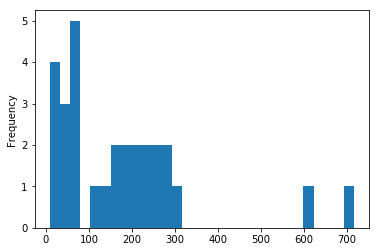

In [60]:
## Clasifico según cantidad de pxdia

datos_crudos.loc[datos_crudos.año == 2015, :].promedio_pacientes_x_día.plot(kind='hist', bins=30)

Se pueden identificar 3 clases: 
- entre 0 y 100
- entre 100 y 250
- más de 250

In [61]:
def assign_clase(x):
    if (x >= 0) & (x <= 100):
        return 'baja'
    elif (x > 100) & (x <= 250):
        return 'media'
    elif (x > 250):
        return 'alta'

datos_crudos['concurrencia'] = datos_crudos.promedio_pacientes_x_día.apply(lambda ppd: assign_clase(ppd))

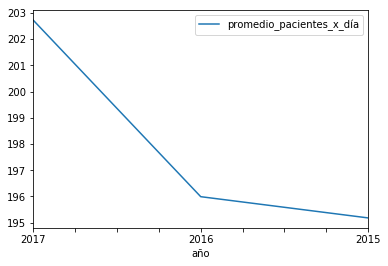

In [36]:
ppxdia = datos_crudos.loc[datos_crudos.hospital == hospitales[2], ['año','promedio_pacientes_x_día']]
ppxdia.plot(x='año', y='promedio_pacientes_x_día', kind='line')

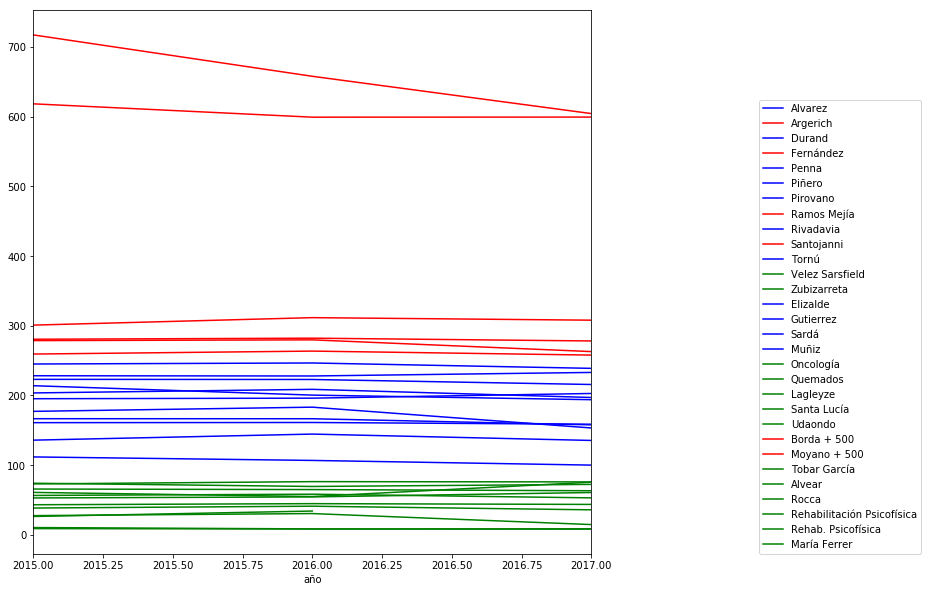

In [75]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

color = {
    'alta':'red',
    'media':'blue',
    'baja':'green'
}


# ppxdia = datos_crudos.loc[datos_crudos.concurrencia == 'alta', ['hospital', 'año', 'promedio_pacientes_x_día']]
# ppxdia.plot(x='año', y='promedio_pacientes_x_día', color=color['alta'], ax=ax)

for hosp in hospitales:
    ppxdia = datos_crudos.loc[datos_crudos.hospital == hosp, ['concurrencia', 'año', 'promedio_pacientes_x_día']]
    
    if ppxdia.promedio_pacientes_x_día.iloc[0] > 500:
        hosp+=' + 500'
    
    ppxdia.plot(x='año', y='promedio_pacientes_x_día', color=color[ppxdia.concurrencia.iloc[-1]], ax=ax, label=hosp)
    plt.legend(loc=(1.3,0))


In [73]:
datos_crudos.loc[datos_crudos.promedio_pacientes_x_día > 500]

,año,hospital,egresos,promedio_pacientes_x_día,promedio_camas_dispon,%_ocupación,promedio_permanencia,tasa_de_mortalidad,giro,consultas_externas,concurrencia
66,2017,Borda,853,599.38,688,87.12,256.47,0.59,1.24,36408,alta
67,2016,Borda,913,599.26,705.22,84.98,240.23,1.1,1.29,32710,alta
68,2015,Borda,887,618.41,746.96,82.79,254.47,0.79,1.19,31133,alta
69,2017,Moyano,980,604.42,897.95,67.31,225.12,1.33,1.09,28904,alta
70,2016,Moyano,1034,657.92,900.69,73.05,232.88,1.74,1.15,29985,alta
71,2015,Moyano,1010,717.32,925.82,77.48,259.23,2.38,1.09,32789,alta


## Promedio de Camas Disponibles

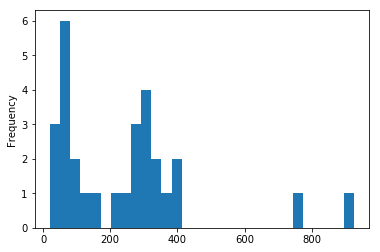

In [74]:
datos_crudos.loc[datos_crudos.año == 2015, :].promedio_camas_dispon.plot(kind='hist', bins=30)

Hay de nuevo, 3 clases bien evidentes:
- 0 a 200
- 200 a 400
- más de 400

In [76]:
def assign_dispon(x):
    if (x >= 0) & (x <= 200):
        return 'baja'
    elif (x > 200) & (x <= 400):
        return 'media'
    elif (x > 400):
        return 'alta'

datos_crudos['dispon'] = datos_crudos.promedio_camas_dispon.apply(lambda ppd: assign_dispon(ppd))

In [81]:
datos_crudos.promedio_camas_dispon = datos_crudos.promedio_camas_dispon.astype(int)

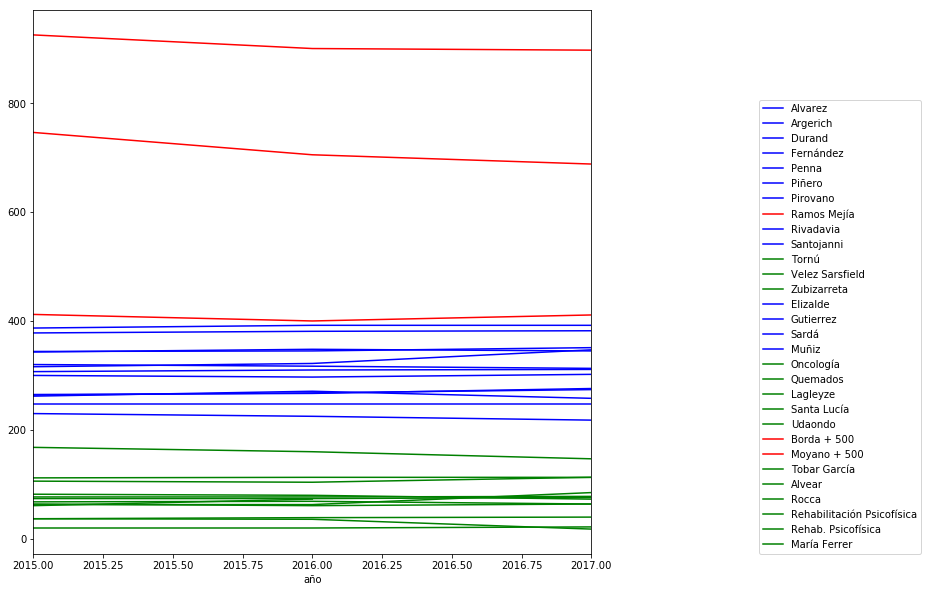

In [85]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for hosp in hospitales:
    ppxdia = datos_crudos.loc[datos_crudos.hospital == hosp, ['dispon', 'año', 'promedio_pacientes_x_día',
                                                              'promedio_camas_dispon']]    
    if ppxdia.promedio_pacientes_x_día.iloc[0] > 500:
        hosp+=' + 500'
    
    ppxdia.plot(x='año', y='promedio_camas_dispon', color=color[ppxdia.dispon.iloc[-1]], ax=ax, label=hosp)
plt.legend(loc=(1.3,0))

In [91]:
datos_crudos.sort_values(['hospital', 'año', 'promedio_pacientes_x_día'], ascending=True)

,año,hospital,egresos,promedio_pacientes_x_día,promedio_camas_dispon,%_ocupación,promedio_permanencia,tasa_de_mortalidad,giro,consultas_externas,concurrencia,dispon
2,2015,Alvarez,9087,177.04,262,67.56,7.11,4.47,34.68,452472,media,media
1,2016,Alvarez,9481,183.06,271,67.36,7.07,5.15,34.89,466690,media,media
0,2017,Alvarez,8279,153.21,258,59.29,6.75,5.41,32.04,462315,media,media
77,2015,Alvear,364,60.74,63,95.8,60.91,0,5.74,23972,baja,baja
76,2016,Alvear,304,54.81,63,85.81,65.99,0,4.76,14310,baja,baja
75,2017,Alvear,407,75.37,85,88.55,67.59,0.25,4.78,22656,baja,baja
5,2015,Argerich,12943,300.82,387,77.57,8.48,4.19,33.37,792732,alta,media
4,2016,Argerich,12965,311.53,392,79.31,8.79,5.04,33.01,738421,alta,media
3,2017,Argerich,12613,307.9,392,78.49,8.91,5.48,32.15,701787,alta,media
68,2015,Borda,887,618.41,746,82.79,254.47,0.79,1.19,31133,alta,alta


In [92]:
datos_crudos.columns

Index(['año', 'hospital', 'egresos', 'promedio_pacientes_x_día',
       'promedio_camas_dispon', '%_ocupación', 'promedio_permanencia',
       'tasa_de_mortalidad', 'giro', 'consultas_externas', 'concurrencia',
       'dispon'],
      dtype='object')

In [98]:
datos_crudos.tasa_de_mortalidad = datos_crudos.tasa_de_mortalidad.astype(float)

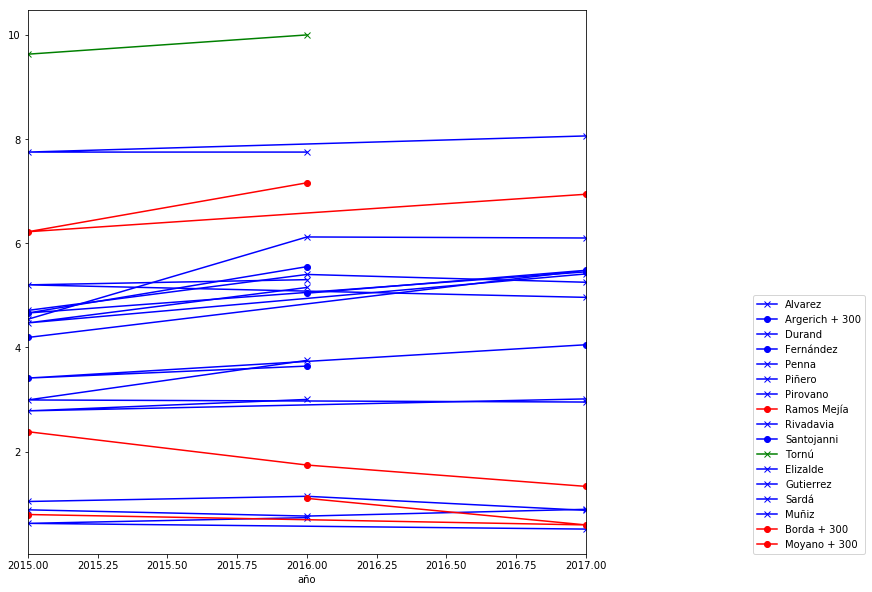

In [112]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for hosp in hospitales:
    ppxdia = datos_crudos.loc[(datos_crudos.hospital == hosp) & (datos_crudos.tasa_de_mortalidad > 0) &
                              (datos_crudos.concurrencia != 'baja'), ['dispon', 'año', 'promedio_pacientes_x_día',
                                                              'tasa_de_mortalidad', 'concurrencia']]
    
    if ppxdia.shape[0] > 0:
        
        marker = {
            'media':'x',
            'alta': 'o'
        }
        
        if ppxdia.promedio_pacientes_x_día.iloc[0] > 300:
            hosp+=' + 300'
    
        ppxdia.plot(x='año', y='tasa_de_mortalidad', color=color[ppxdia.dispon.iloc[-1]],
                    marker=marker[ppxdia.concurrencia.iloc[-1]], ax=ax, label=hosp)
plt.legend(loc=(1.3,0))

**El Tornú tiene una baja disponibilidad de camas, la tasa de mortalidad más alta y una concurrencia media**

# Enfoque en el Tornú

In [115]:
datos_crudos.columns

Index(['año', 'hospital', 'egresos', 'promedio_pacientes_x_día',
       'promedio_camas_dispon', '%_ocupación', 'promedio_permanencia',
       'tasa_de_mortalidad', 'giro', 'consultas_externas', 'concurrencia',
       'dispon'],
      dtype='object')

In [116]:
tornu = datos_crudos.loc[datos_crudos.hospital == 'Tornú']

In [117]:
tornu

,año,hospital,egresos,promedio_pacientes_x_día,promedio_camas_dispon,%_ocupación,promedio_permanencia,tasa_de_mortalidad,giro,consultas_externas,concurrencia,dispon
30,2017,Tornú,4013,99.91,147,67.95,9.09,10.91,27.29,284067,baja,baja
31,2016,Tornú,4430,106.62,160,66.52,8.81,10.00,27.64,306808,media,baja
32,2015,Tornú,4425,111.64,168,66.26,9.21,9.63,26.26,323806,media,baja


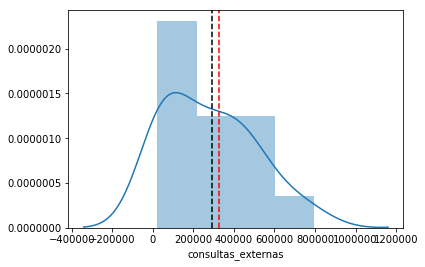

In [123]:
sns.distplot(datos_crudos.loc[datos_crudos.año == 2017].consultas_externas.astype(int))
plt.axvline(tornu.consultas_externas.iloc[-1], color='red', ls='--')
plt.axvline(datos_crudos.consultas_externas.astype(int).mean(), color='black', ls='--')

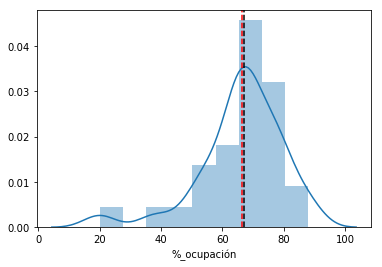

In [126]:
sns.distplot(datos_crudos.loc[datos_crudos.año == 2017]['%_ocupación'].astype(int))
plt.axvline(tornu['%_ocupación'].iloc[-1], color='red', ls='--')
plt.axvline(datos_crudos['%_ocupación'].astype(int).mean(), color='black', ls='--')

Text(50, 0.08, 'Tomo mediana por el efecto de la cola larga')

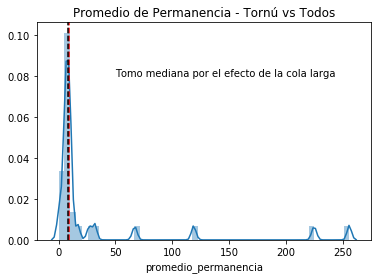

In [154]:
sns.distplot(datos_crudos.loc[datos_crudos.año == 2017].promedio_permanencia.astype(int))
plt.axvline(tornu.promedio_permanencia.iloc[-1], color='red', ls='--')
plt.axvline(datos_crudos.promedio_permanencia.astype(int).median(), color='black', ls='--')
plt.title('Promedio de Permanencia - Tornú vs Todos')
plt.annotate('Tomo mediana por el efecto de la cola larga', xy=(50, 0.08))

# Análisis General de Variables

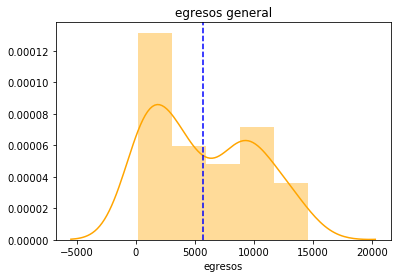

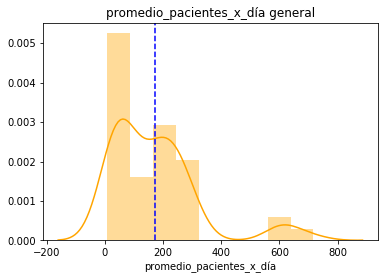

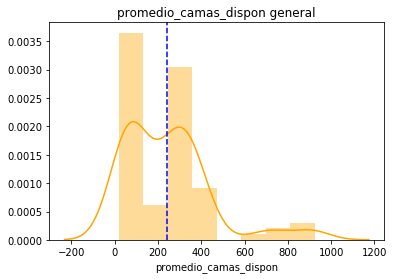

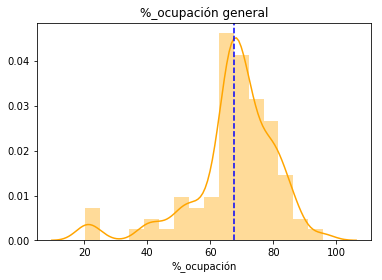

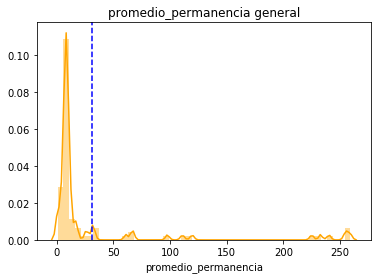

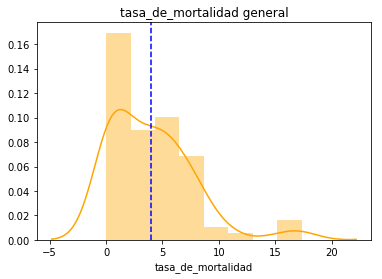

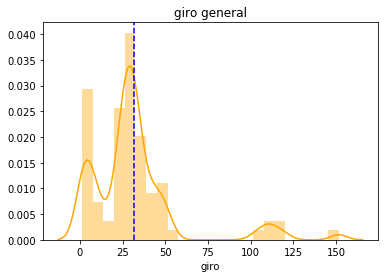

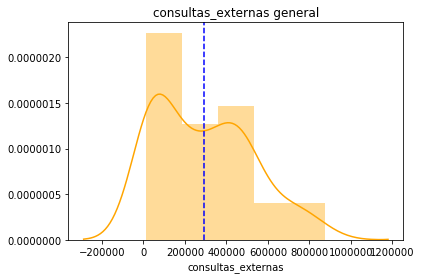

In [158]:
datos_crudos.columns

num_feats = ['egresos', 'promedio_pacientes_x_día',
       'promedio_camas_dispon', '%_ocupación', 'promedio_permanencia',
       'tasa_de_mortalidad', 'giro', 'consultas_externas']

for feat in num_feats:
    sns.distplot(datos_crudos[feat].astype(float).apply(lambda x: round(x, 3)), color='orange')
    
    plt.axvline(datos_crudos[feat].astype(float).apply(lambda x: round(x, 3)).mean(), color = 'blue', ls='--')
    
    plt.title(f'{feat} general')
    plt.show()

In [159]:
datos_crudos.loc[datos_crudos.giro > 100]

,año,hospital,egresos,promedio_pacientes_x_día,promedio_camas_dispon,%_ocupación,promedio_permanencia,tasa_de_mortalidad,giro,consultas_externas,concurrencia,dispon
60,2017,Santa Lucía,4355,8.08,40,20.2,0.68,0.00,108.88,589755,baja,baja
61,2016,Santa Lucía,4104,8.19,39,20.62,0.73,0.02,103.35,628508,baja,baja
58,2016,Lagleyze,2253,8.36,20,40.97,1.36,0.00,110.36,208332,baja,baja
57,2017,Lagleyze,2627,8.47,22,38.51,1.18,0.00,119.41,206042,baja,baja
62,2015,Santa Lucía,4223,8.78,37,23.74,0.76,0.02,114.14,719076,baja,baja
59,2015,Lagleyze,3034,10.28,20,51.41,1.24,0.00,151.7,201601,baja,baja


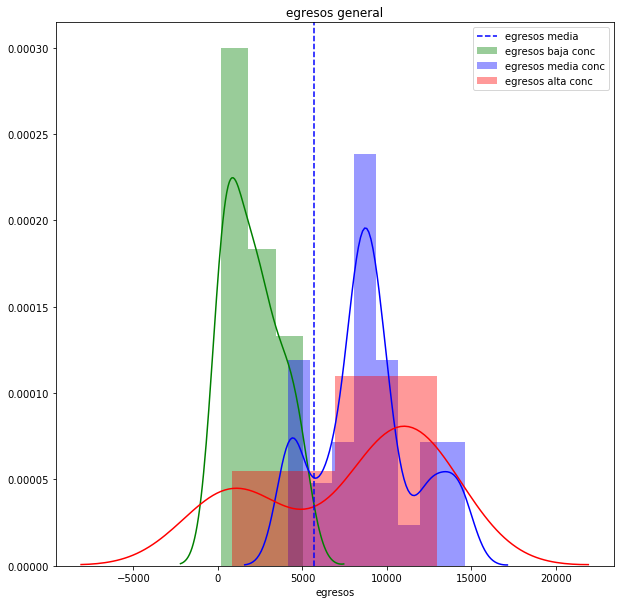

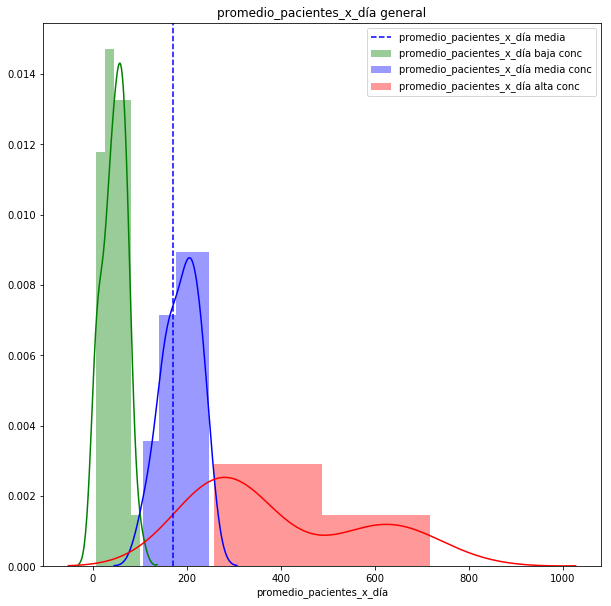

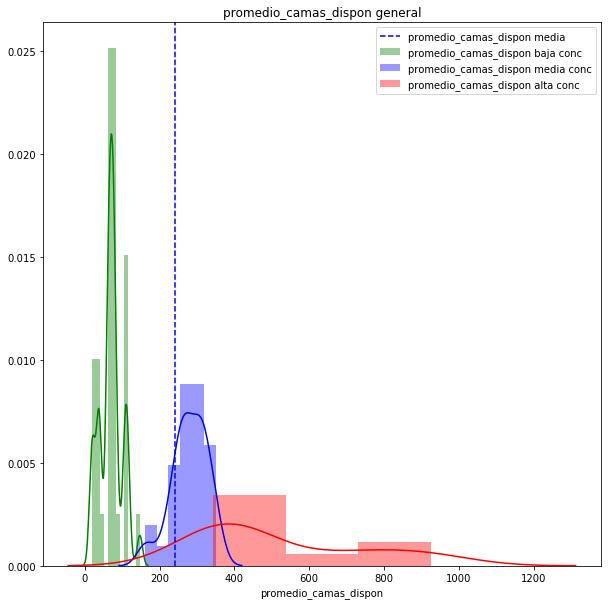

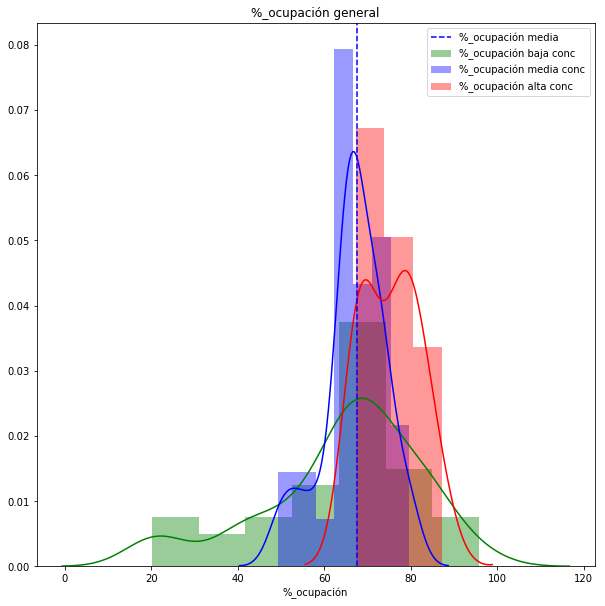

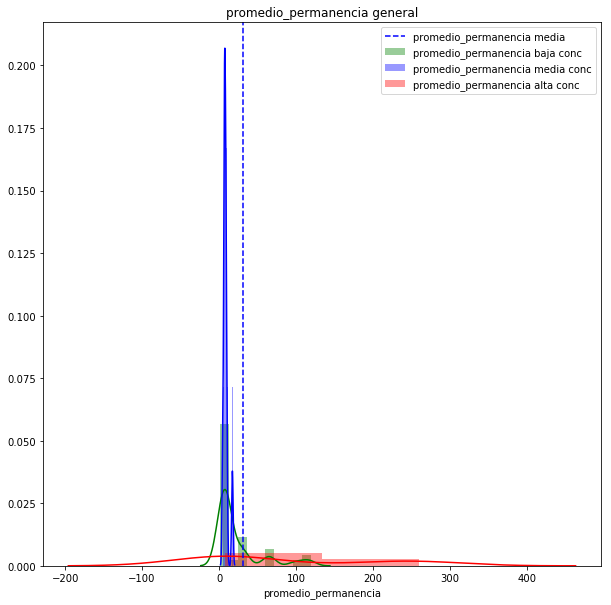

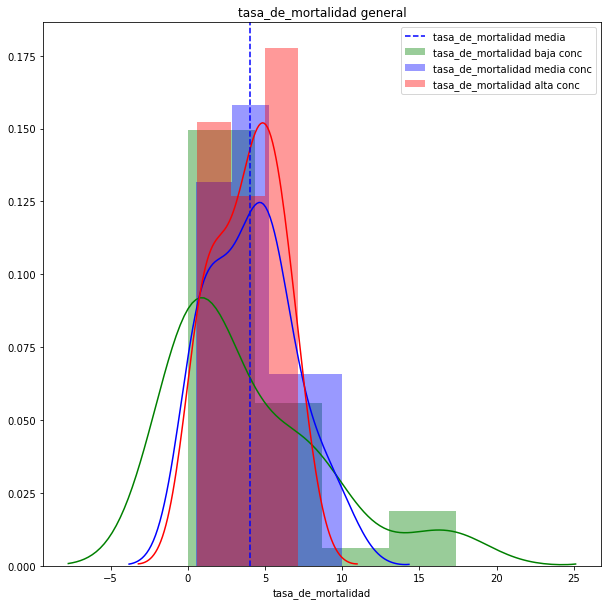

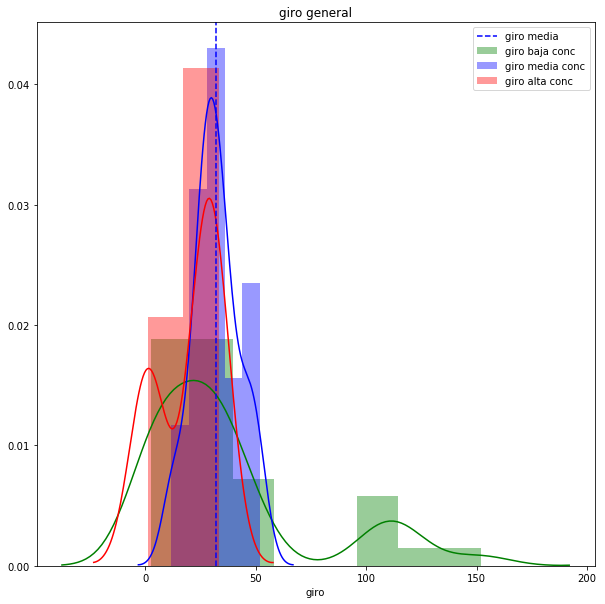

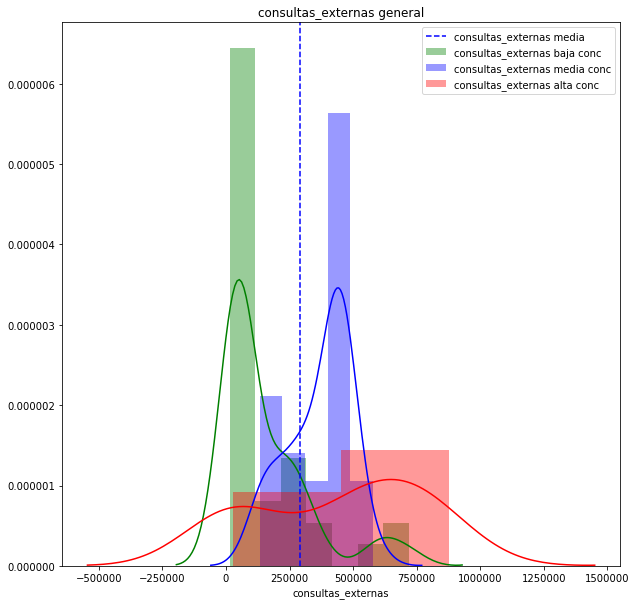

In [167]:
datos_crudos.columns

num_feats = ['egresos', 'promedio_pacientes_x_día',
       'promedio_camas_dispon', '%_ocupación', 'promedio_permanencia',
       'tasa_de_mortalidad', 'giro', 'consultas_externas']

for feat in num_feats:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    for conc in datos_crudos.concurrencia.unique():
        sns.distplot(datos_crudos.loc[datos_crudos.concurrencia == conc,
                                      feat].astype(float).apply(lambda x: round(x, 3)), color=color[conc], ax = ax, label=feat+ ' ' + conc + ' conc')
    
    plt.axvline(datos_crudos[feat].astype(float).apply(lambda x: round(x, 3)).mean(), color = 'blue', ls='--', label=f'{feat} media')
    plt.legend()
    plt.title(f'{feat} general')
    
    save_string = f'./imgs/{feat}_general.jpg'
    
    plt.savefig(save_string)